<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report

## Uploading the dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path_0 = kagglehub.dataset_download("unsdsn/world-happiness")
path_1 = kagglehub.dataset_download("kaggle/world-development-indicators")

print("Path to dataset files:", path_0)
print("Path to dataset files:", path_1)

100%|██████████| 36.8k/36.8k [00:00<00:00, 32.7MB/s]

Extracting files...


100%|██████████| 369M/369M [00:06<00:00, 57.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2
Path to dataset files: /root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2


In [3]:
path = Path(path_0)

list(path.iterdir())

[PosixPath('/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2017.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2015.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2019.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2018.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2016.csv')]

In [4]:
path_wdi = Path(path_1)

list(path_wdi.iterdir())

[PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/Series.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/Indicators.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/hashes.txt'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/Footnotes.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/Country.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/SeriesNotes.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/CountryNotes.csv'),
 PosixPath('/root/.cache/kagglehub/datasets/kaggle/world-development-indicators/versions/2/database.sqlite')]

In [5]:
data_wdi = pd.read_csv(path_wdi / 'Country.csv')
world_dev = data_wdi.copy()

In [6]:
data_2015 = pd.read_csv(path / '2015.csv')
happiness2015 = data_2015.copy()

data_2016 = pd.read_csv(path / '2016.csv')
happiness2016 = data_2016.copy()

data_2017 = pd.read_csv(path / '2017.csv')
happiness2017 = data_2017.copy()

## Dataset preview

In [ ]:
first_5 = happiness2015.head()
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [ ]:
world_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountryCode                                 247 non-null    object 
 1   ShortName                                   247 non-null    object 
 2   TableName                                   247 non-null    object 
 3   LongName                                    247 non-null    object 
 4   Alpha2Code                                  244 non-null    object 
 5   CurrencyUnit                                214 non-null    object 
 6   SpecialNotes                                164 non-null    object 
 7   Region                                      214 non-null    object 
 8   IncomeGroup                                 214 non-null    object 
 9   Wb2Code                                     246 non-null    object 
 10  NationalAccoun

## Part I

In [ ]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for region in regions:
  region_group = happiness2015[happiness2015['Region'] == region]
  hs_region = region_group['Happiness Score'].mean()
  mean_happiness[region] = hs_region

mean_happiness

{'Western Europe': np.float64(6.689619047619048),
 'North America': np.float64(7.273),
 'Australia and New Zealand': np.float64(7.285),
 'Middle East and Northern Africa': np.float64(5.406899999999999),
 'Latin America and Caribbean': np.float64(6.1446818181818195),
 'Southeastern Asia': np.float64(5.317444444444444),
 'Central and Eastern Europe': np.float64(5.332931034482757),
 'Eastern Asia': np.float64(5.626166666666666),
 'Sub-Saharan Africa': np.float64(4.2028),
 'Southern Asia': np.float64(4.580857142857143)}

In [ ]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
grouped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [ ]:
north_america = happiness2015.iloc[[4, 14]]
na_group = grouped.get_group('North America')
equal = north_america is na_group
equal

False

In [ ]:
grouped.size()

,0
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


In [ ]:
means = grouped.mean(numeric_only=True)
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [ ]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [ ]:
def dif(group):
    return group.max() - group.mean()

happy_mean_max = happy_grouped.agg(['mean', 'max'])
happy_mean_max_dif = happy_grouped.agg(dif)

happy_mean_max_dif

,Happiness Score
Region,
Australia and New Zealand,0.001000
Central and Eastern Europe,1.172069
Eastern Asia,0.671833
Latin America and Caribbean,1.081318
Middle East and Northern Africa,1.871100
North America,0.154000
Southeastern Asia,1.480556
Southern Asia,0.672143
Sub-Saharan Africa,1.274200


In [ ]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


/tmp/ipython-input-1830534047.py:1: FutureWarning: The provided callable <function mean at 0x797e421e7880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pv_happiness = happiness2015.pivot_table(values='Happiness Score',


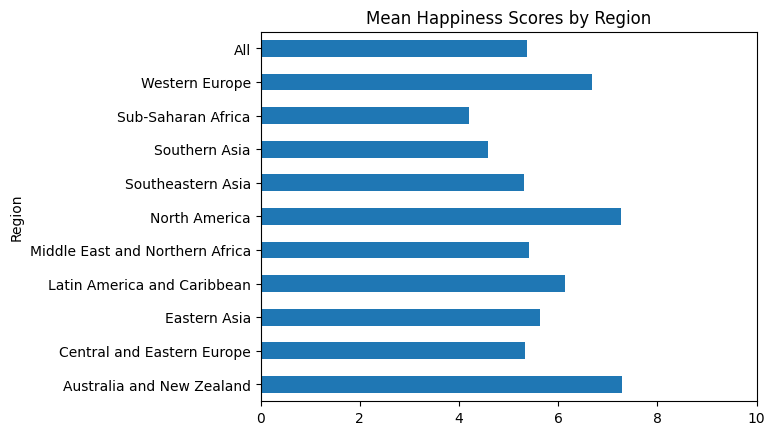

In [ ]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score',
                                          index='Region',
                                          aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region',
                  legend=False, xlim=(0,10))
plt.show()

In [ ]:
world_mean_happiness = happiness2015['Happiness Score'].mean()
print(world_mean_happiness)
print(pv_happiness.loc['All'])

5.375734177215189
Happiness Score    5.375734
Name: All, dtype: float64


In [ ]:
grouped_2 = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped_2.agg(func=['min', 'max', 'mean'])
happy_family_stats


Happiness Score                    Family  \
                                            min    max      mean      min   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                     max      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [ ]:
grouped_2 = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped_2.agg(func=['min', 'max', 'mean'])
happy_family_stats

Happiness Score                    Family  \
                                            min    max      mean      min   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                     max      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [ ]:
pv_happy_family_stats = happiness2015.pivot_table(
    index='Region', values=['Happiness Score', 'Family'],
    aggfunc=['min', 'max', 'mean'], margins=True)
pv_happy_family_stats

min                      max  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

##Part II

In [ ]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [ ]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
print(head_2015, '\n')
print(head_2016)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015 

       Country  Happiness Score  Year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016


In [ ]:
pd.concat([head_2015, head_2016], axis=0)

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [ ]:
pd.concat([head_2015, head_2016], axis=1)

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [ ]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [ ]:
pd.concat([head_2015, head_2016], axis=0)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [ ]:
pd.concat([head_2015, head_2016], axis=0, ignore_index=True)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [ ]:
pd.merge(left=three_2015, right=three_2016, on='Country')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [ ]:
pd.merge(left=three_2015, right=three_2016, on='Country', how='left')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [ ]:
pd.merge(left=three_2016, right=three_2015, on='Country', how='left')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [ ]:
pd.merge(left=three_2015, right=three_2016, how='left',
                  on='Country', suffixes=('_2015', '_2016'))

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [ ]:
pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country',
                                  suffixes=('_2016', '_2015'))

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [ ]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [ ]:
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [ ]:
pd.merge(left = four_2015, right = three_2016,
                       left_index = True, right_index = True, how='right',
                       suffixes = ('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [ ]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [ ]:
combined = pd.concat([happiness2015, happiness2016, happiness2017])

In [ ]:
combined.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,...,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,...,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,...,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,...,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024
154,Central African Republic,NaN,NaN,2.693,NaN,NaN,0.000000,NaN,0.270842,NaN,...,2017,NaN,NaN,155.0,2.864884,2.521116,0.000000,0.018773,0.056565,2.066005


/tmp/ipython-input-2627961812.py:1: FutureWarning: The provided callable <function mean at 0x797e421e7880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_combined = combined.pivot_table('Happiness Score', 'Year', aggfunc=np.mean)


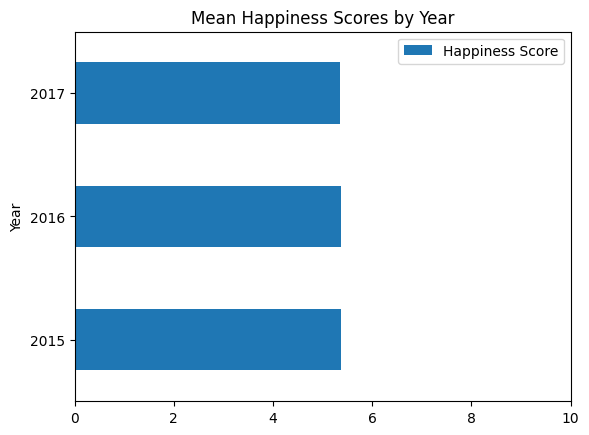

In [ ]:
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year',
                          xlim=(0, 10))
plt.show()

##Part III

In [ ]:
mapping = {'Economy (GDP per Capita)': 'Economy',
           'Health (Life Expectancy)': 'Health',
           'Trust (Government Corruption)': 'Trust' }

happiness2015.rename(mapping, axis=1, inplace=True)

In [ ]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [ ]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [ ]:
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
economy_impact_map.equals(economy_impact_apply)

True

In [ ]:
# @title
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [ ]:
# @title
happiness2015['Economy'].apply(label, x=0.8)

,Economy
0,High
1,High
2,High
3,High
4,High
...,...
153,Low
154,Low
155,Low
156,Low


In [ ]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [ ]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].map(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low


In [ ]:
def v_counts(col):
  num = col.value_counts()
  den = col.size
  return num / den

factors_impact.apply(v_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [ ]:
def percentages(col):
  div = col / happiness2015['Happiness Score']
  return 100 * div

factors = ['Economy', 'Family', 'Health', 'Freedom',
           'Trust', 'Generosity', 'Dystopia Residual']

happiness2015[factors].apply(percentages)

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795


In [ ]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

melt['Percentage'] = round((melt['value'] / melt['Happiness Score'] * 100), 2)
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


In [ ]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


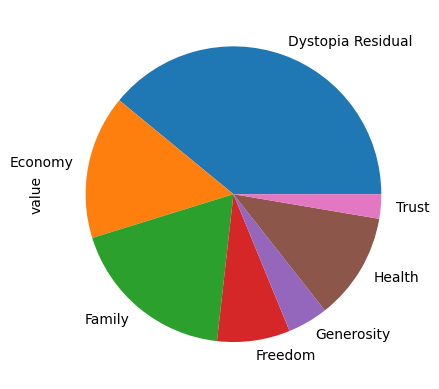

In [ ]:
pv_melt = melt.pivot_table(index='variable', values='value')

pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()

## Part IV

In [ ]:
print(world_dev.shape)
print(happiness2015.shape)

(247, 31)
(158, 13)


In [ ]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = pd.merge(left=happiness2015, right=world_dev, how='left',
         left_on='Country', right_on='ShortName').rename(columns=col_renaming)

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region_x                       158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy                        158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health                         158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust                          158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [ ]:
def extract_last_word(element):
  if element is np.nan:
    return element
  else:
    return element.split()[-1]

In [ ]:
merged['CurrencyUnit'].apply(extract_last_word)

,CurrencyUnit
0,franc
1,krona
2,krone
3,krone
4,dollar
...,...
153,franc
154,franc
155,NaN
156,franc


In [ ]:
merged['CurrencyUnit'].str.split().str.get(-1)

pandas.core.series.Series

In [ ]:
merged['CurrencyUnit'].str.len()

,CurrencyUnit
0,11.0
1,13.0
2,12.0
3,15.0
4,15.0
...,...
153,13.0
154,22.0
155,NaN
156,13.0


In [ ]:
merged['CurrencyUnit'].str.len().value_counts(dropna=False)

,count
CurrencyUnit,
14.0,21
4.0,20
12.0,17
13.0,14
15.0,13
NaN,13
16.0,12
18.0,9
17.0,9


In [ ]:
pattern = r"[Nn]ational accounts"
merged['SpecialNotes'].str.contains(pattern, na=False)

,SpecialNotes
0,False
1,False
2,False
3,False
4,True
...,...
153,True
154,False
155,False
156,False


In [ ]:
pattern = r'([1-2][0-9]{3})'

merged['SpecialNotes'].str.extract(pattern)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [ ]:
merged = merged.set_index('Country')

KeyError: "None of ['Country'] are in the columns"

In [ ]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

merged['IESurvey'].str.extractall(pattern).value_counts()

,count
Years,
2012,33
2010,28
2011,22
2013,12
2009,8
2008,6
2005,6
2007,4
2004,3


In [ ]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

years = merged['IESurvey'].str.extractall(pattern)
years['First_Year'].str[:2]
years['First_Year'].str[:2] + years['Second_Year']

,,0
Country,match,
Switzerland,0,NaN
Iceland,0,NaN
Denmark,0,NaN
Norway,0,NaN
Canada,0,NaN
...,...,...
Afghanistan,0,NaN
Rwanda,0,2011
Benin,0,2012


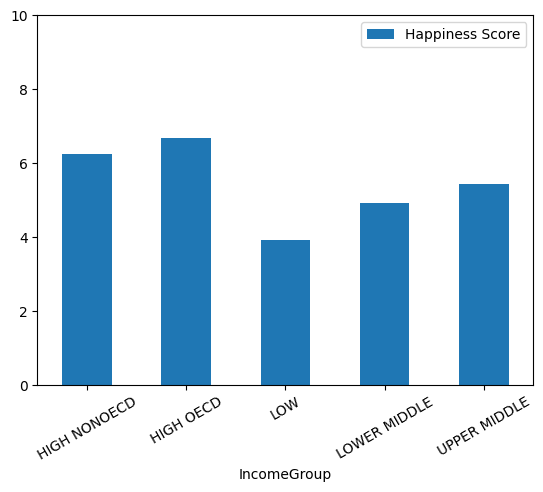

In [ ]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.upper()\
                      .str.replace(r'\s*INCOME:?\s*', ' ', regex=True)\
                      .str.strip()

pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

pv_incomes.plot(kind='bar', rot=30, ylim=(0, 10))
plt.show()

##Part V

*Uploading the modified dataset*

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datasets = Path('/content/drive/MyDrive/Colab Notebooks/Datasets')

Mounted at /content/drive


In [9]:
file_2015 = 'wh_2015.csv'
file_2016 = 'wh_2016.csv'
file_2017 = 'wh_2017.csv'

raw_2015 = pd.read_csv(Path.joinpath(datasets, file_2015))
happiness2015 = raw_2015.copy()
raw_2016 = pd.read_csv(Path.joinpath(datasets, file_2016))
happiness2016 = raw_2016.copy()
raw_2017 = pd.read_csv(Path.joinpath(datasets, file_2017))
happiness2017 = raw_2017.copy()

In [10]:
print(happiness2015.shape)
print(happiness2016.shape)
print(happiness2017.shape)

(164, 13)
(164, 14)
(164, 13)


In [11]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [12]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').\
  str.replace(r'\s+', ' ', regex=True).str.strip().str.upper()

In [13]:
print(happiness2015.columns)
print(happiness2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')


In [14]:
happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]', '', regex=True).str.upper()
happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '', regex=True).str.upper()

In [70]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isna().sum()
missing

,0
COUNTRY,0
REGION,177
HAPPINESS RANK,22
HAPPINESS SCORE,22
STANDARD ERROR,334
ECONOMY GDP PER CAPITA,22
FAMILY,22
HEALTH LIFE EXPECTANCY,22
FREEDOM,22
TRUST GOVERNMENT CORRUPTION,22


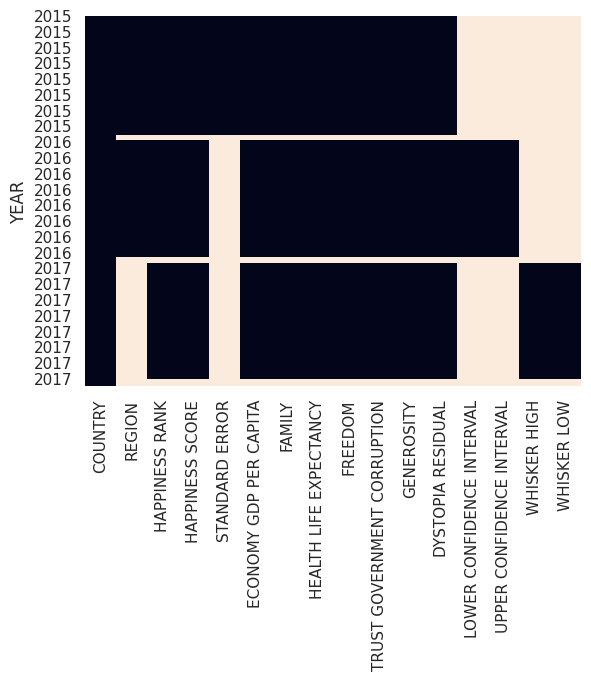

In [16]:
import seaborn as sns

sns.set()
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [17]:
regions_2017 = combined[combined['YEAR'] == 2017].loc[:, 'REGION']
missing = regions_2017.isna().sum()
missing

np.int64(164)

In [71]:
regions = pd.concat([happiness2015, happiness2016], ignore_index=True)
regions = regions[['COUNTRY', 'REGION']].drop_duplicates().dropna()
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
215,Belize,Latin America and Caribbean
239,Somalia,Sub-Saharan Africa
260,Somaliland Region,Sub-Saharan Africa
276,Namibia,Sub-Saharan Africa


In [72]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')

In [73]:
combined.drop('REGION_x', axis=1, inplace=True)

In [23]:
missing = combined.isna().sum()
missing

,0
COUNTRY,0
HAPPINESS RANK,22
HAPPINESS SCORE,22
STANDARD ERROR,334
ECONOMY GDP PER CAPITA,22
FAMILY,22
HEALTH LIFE EXPECTANCY,22
FREEDOM,22
TRUST GOVERNMENT CORRUPTION,22
GENEROSITY,22


In [74]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [75]:
combined[combined[['COUNTRY', 'YEAR']].duplicated()]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [76]:
combined.rename(columns={'REGION_y' : 'REGION'}, inplace=True)

In [77]:
combined.drop_duplicates(['COUNTRY', 'YEAR'], inplace=True)

In [78]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined.drop(columns_to_drop, axis=1)
combined.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'STANDARD ERROR',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'REGION'],
      dtype='object')

In [79]:
combined.dropna(axis=1, thresh=450, inplace=True)

In [80]:
combined.isna().sum()

,0
COUNTRY,0
HAPPINESS RANK,19
HAPPINESS SCORE,19
ECONOMY GDP PER CAPITA,19
FAMILY,19
HEALTH LIFE EXPECTANCY,19
FREEDOM,19
TRUST GOVERNMENT CORRUPTION,19
GENEROSITY,19
DYSTOPIA RESIDUAL,19


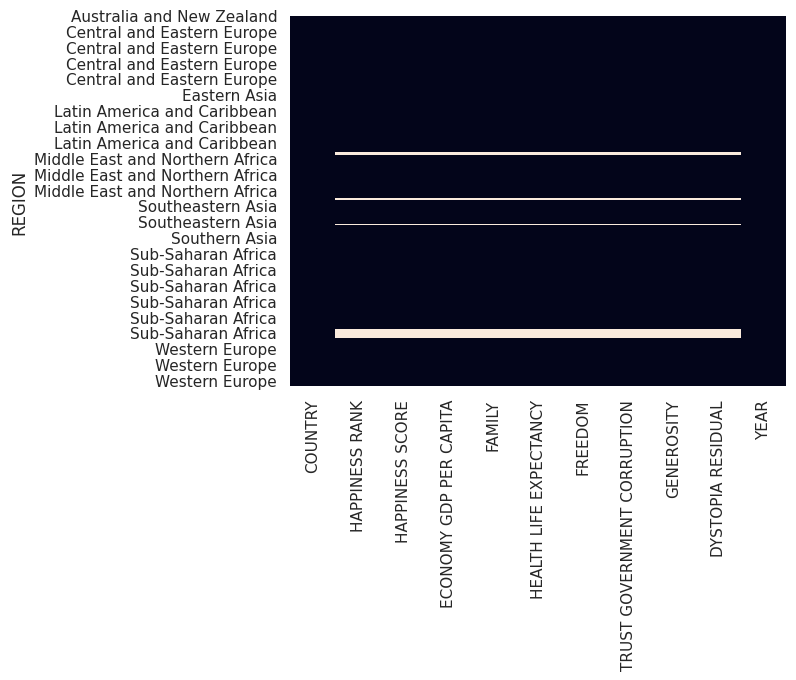

In [81]:
visio = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(visio.isnull(), cbar=False)
plt.show()

In [82]:
happiness_mean = combined['HAPPINESS SCORE'].mean()

In [83]:
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

In [84]:
combined = combined.dropna(axis=0)
combined.isna().sum()

,0
COUNTRY,0
HAPPINESS RANK,0
HAPPINESS SCORE,0
ECONOMY GDP PER CAPITA,0
FAMILY,0
HEALTH LIFE EXPECTANCY,0
FREEDOM,0
TRUST GOVERNMENT CORRUPTION,0
GENEROSITY,0
DYSTOPIA RESIDUAL,0
